# Proyek Analisis Data: Fariz Husain Albar

   - Nama: Fariz Husain Albar
   - Email: khudnul88@gmail.com
   - Id Dicoding: Data Scientist

## Menentukan Pertanyaan Bisnis

1. Berapa jumlah rata-rata persewaan sepeda per jam berdasarkan musim di kedua tahun?

2. Pada hari apa permintaan sepeda per jam sedang tinggi, baik pada hari kerja maupun hari libur?

3. Bagaimana pengaruh situasi cuaca terhadap jumlah penyewaan sepeda per jam?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hour_df`

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore `hour_df`

###### menemukan jumlah total sepeda sewaan per jam

In [20]:
hour_df["cnt"].sum()

3292679

###### Rincian tahunan jumlah total, jumlah maksimum, jumlah minimum sepeda yang disewa berdasarkan laporan per jam

In [21]:
hour_df.groupby(["yr"])["cnt"].agg(["sum","max","min"])

,sum,max,min
yr,,,
0,1243103,651,1
1,2049576,977,1


###### Representasi visual dari sewa sepeda maksimum per jam di kedua tahun

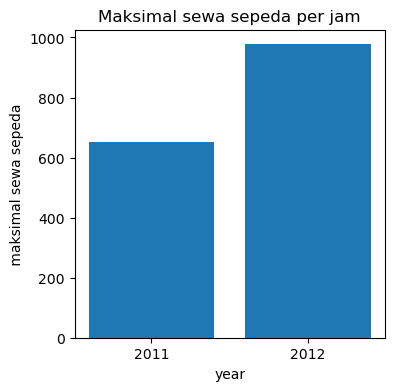

In [22]:
plt.figure(figsize=(4,4))
plt.bar(hour_df["yr"],hour_df["cnt"])
plt.ylabel(' maksimal sewa sepeda ')
plt.xlabel('year')
plt.title("Maksimal sewa sepeda per jam")
plt.xticks([0,1],['2011', '2012'])
plt.show()

##### menemukan musim puncak untuk sistem persewaan sepeda

In [23]:
a=hour_df.groupby(["season"])["cnt"].agg(["sum","max","min"])
a

,sum,max,min
season,,,
1,471348,801,1
2,918589,957,1
3,1061129,977,1
4,841613,967,1


In [24]:
a.sort_values(by="sum",ascending=False)

,sum,max,min
season,,,
3,1061129,977,1
2,918589,957,1
4,841613,967,1
1,471348,801,1


#####  menemukan musim puncak di kedua tahun tersebut 

In [25]:
k=hour_df.groupby(["yr","season"])["cnt"].agg(["sum","max","min","count"])
k

sum  max  min  count
yr season                         
0  1       150000  405    1   2068
   2       347316  638    1   2203
   3       419650  651    1   2240
   4       326137  625    1   2134
1  1       321348  801    1   2174
   2       571273  957    1   2206
   3       641479  977    2   2256
   4       515476  967    1   2098

In [26]:
k.sort_values(by="sum",ascending=False)

sum  max  min  count
yr season                         
1  3       641479  977    2   2256
   2       571273  957    1   2206
   4       515476  967    1   2098
0  3       419650  651    1   2240
   2       347316  638    1   2203
   4       326137  625    1   2134
1  1       321348  801    1   2174
0  1       150000  405    1   2068

##### menemukan jumlah rata-rata persewaan sepeda per jam berdasarkan musim di kedua tahun

In [27]:
hour_df.groupby(["yr","season"])["cnt"].agg("mean")

yr  season
0   1          72.533849
    2         157.655924
    3         187.343750
    4         152.828960
1   1         147.814167
    2         258.963282
    3         284.343528
    4         245.698761
Name: cnt, dtype: float64

##### menemukan jumlah sewa sepeda bulanan

In [28]:
z=hour_df.groupby(["mnth"])["cnt"].agg(["sum","max","min"])
z

,sum,max,min
mnth,,,
1,134933,559,1
2,151352,610,1
3,228920,957,1
4,269094,822,1
5,331686,873,1
6,346342,900,1
7,344948,913,1
8,351194,941,1
9,345991,977,1


In [29]:
z.sort_values(by="sum",ascending=False)

,sum,max,min
mnth,,,
8,351194,941,1
6,346342,900,1
9,345991,977,1
7,344948,913,1
5,331686,873,1
10,322352,963,1
4,269094,822,1
11,254831,729,1
3,228920,957,1


###### Statistik sewa sepeda tahunan dan bulanan

In [30]:
p=hour_df.groupby(["yr","mnth"])["cnt"].agg(["sum","max","min"])
p

sum  max  min
yr mnth                  
0  1      38189  249    1
   2      48215  327    1
   3      64045  336    1
   4      94870  530    1
   5     135821  611    1
   6     143512  638    1
   7     141341  596    1
   8     136691  651    1
   9     127418  628    1
   10    123511  625    1
   11    102167  553    1
   12     87323  477    1
1  1      96744  559    1
   2     103137  610    1
   3     164875  957    1
   4     174224  822    1
   5     195865  873    1
   6     202830  900    4
   7     203607  913    2
   8     214503  941    3
   9     218573  977    3
   10    198841  963    1
   11    152664  729    1
   12    123713  759    1

In [31]:
p.sort_values(by="sum",ascending=False)

sum  max  min
yr mnth                  
1  9     218573  977    3
   8     214503  941    3
   7     203607  913    2
   6     202830  900    4
   10    198841  963    1
   5     195865  873    1
   4     174224  822    1
   3     164875  957    1
   11    152664  729    1
0  6     143512  638    1
   7     141341  596    1
   8     136691  651    1
   5     135821  611    1
   9     127418  628    1
1  12    123713  759    1
0  10    123511  625    1
1  2     103137  610    1
0  11    102167  553    1
1  1      96744  559    1
0  4      94870  530    1
   12     87323  477    1
   3      64045  336    1
   2      48215  327    1
   1      38189  249    1

###### Menemukan pada tanggal berapa sepeda maksimum dan minium disewa

In [32]:
for i in hour_df["mnth"].unique():
    dff=hour_df[hour_df["mnth"]==i]
    print("hitungan maksimum dan hitungan minimum untuk bulan ",i,"\n")
    print("on",dff[dff["cnt"]==dff["cnt"].max()]["dteday"].values,"jumlah sepeda sewaan sudah maksimal " ,i,"bulan\n" )
    #print("minimum count :\n")
    print("on",dff[dff["cnt"]==dff["cnt"].min()]["dteday"].values,"jumlah sepeda sewaan sudah minimal " ,i,"bulan\n" ) 

hitungan maksimum dan hitungan minimum untuk bulan  1 

on ['2012-01-31T00:00:00.000000000'] jumlah sepeda sewaan sudah maksimal  1 bulan

on ['2011-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '2011-01-02T00:00:00.000000000' '2011-01-03T00:00:00.000000000'
 '2011-01-04T00:00:00.000000000' '2011-01-06T00:00:00.000000000'
 '2011-01-07T00:00:00.000000000' '2011-01-07T00:00:00.000000000'
 '2011-01-08T00:00:00.000000000' '2011-01-09T00:00:00.000000000'
 '2011-01-09T00:00:00.000000000' '2011-01-09T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-10T00:00:00.000000000'
 '2011-01-12T00:00:00.000000000' '2011-01-14T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-15T00:00:00.000000000'
 '2011-01-16T00:00:00.000000000' '2011-01-16T00:00:00.000000000'
 '2011-01-17T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-01-20T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-01-21T00:00:00.000000000' '2011-01-23T00:00:00.000000000'
 '2011-01-24T

##### menentukan pada hari apa permintaan sepeda sedang tinggi, baik pada hari kerja maupun hari libur

In [33]:
hour_df.groupby(["workingday"])["cnt"].agg(["sum"])

,sum
workingday,
0,1000269
1,2292410


##### menentukan pengaruh situasi cuaca terhadap jumlah penyewaan sepeda

In [34]:
hour_df["weathersit"].unique()
hour_df.groupby(["weathersit"])["cnt"].agg(["sum"])

,sum
weathersit,
1,2338173
2,795952
3,158331
4,223


## Visualization & Explanatory Analysis

### 1. Berapa jumlah rata-rata persewaan sepeda per jam berdasarkan musim di kedua tahun? :

In [35]:
hour_df.groupby(["yr","season"])["cnt"].agg("mean")

yr  season
0   1          72.533849
    2         157.655924
    3         187.343750
    4         152.828960
1   1         147.814167
    2         258.963282
    3         284.343528
    4         245.698761
Name: cnt, dtype: float64

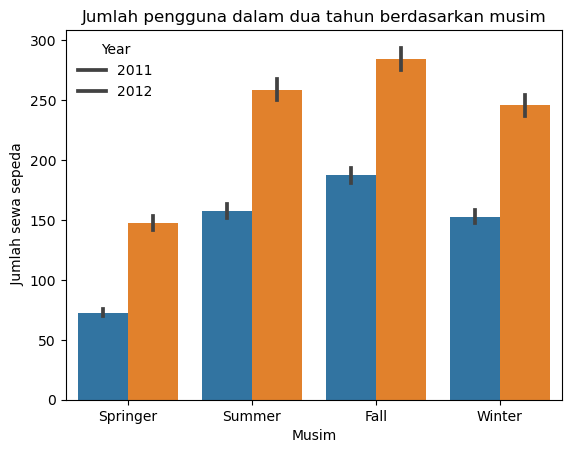

In [36]:
b = sn.barplot(x="season",y="cnt",data=hour_df,hue="yr")
plt.ylabel(' Jumlah sewa sepeda')
plt.xlabel('Musim')
plt.title("Jumlah pengguna dalam dua tahun berdasarkan musim")
plt.xticks([0,1,2,3],['Springer', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Year', loc='best', labels=['2011', '2012'], frameon=False)
plt.show(b);


### Penjelasan :
  1: Springer

  2: Summer

  3: Fall

  4: Winter
  
  Musim puncak adalah musim gugur karena rata-rata persewaan sepeda maksimal pada musim gugur untuk kedua tahun tersebut

### 2. Pada hari apa permintaan sepeda per jam sedang tinggi, baik pada hari kerja maupun hari libur? : 

In [37]:
hour_df.groupby(["workingday"])["cnt"].agg(["sum"])

,sum
workingday,
0,1000269
1,2292410


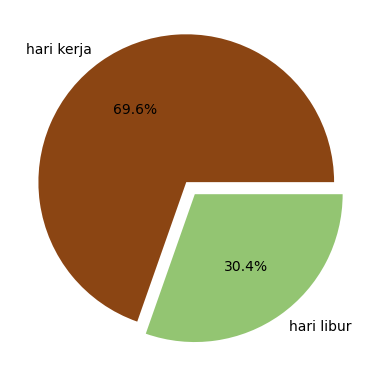

In [38]:
flavors = ('hari kerja', 'hari libur')
votes = (2292410, 1000269)
colors = ('#8B4513', '#93C572')
explode = (0.1, 0)
 
plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

### Penjelasan :
  #### 1. Hari Kerja
  #### 0. Hari Libur
 
 Karena jumlah penyewaan sepeda adalah 2292410 yang tinggi pada hari kerja, jadi manajer bisnis harus berusaha untuk tidak memberikan cuti kepada stafnya pada hari kerja karena permintaan tinggi pada hari-hari tersebut

### 3. Bagaimana pengaruh situasi cuaca terhadap jumlah penyewaan sepeda per jam? :

In [39]:
hour_df["weathersit"].unique()
hour_df.groupby(["weathersit"])["cnt"].agg(["sum"])

,sum
weathersit,
1,2338173
2,795952
3,158331
4,223


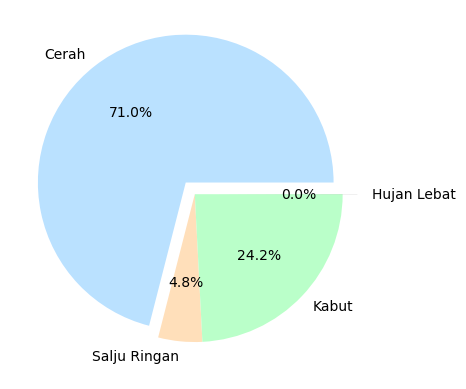

In [40]:
flavors = ('Cerah', 'Salju Ringan', 'Kabut', 'Hujan Lebat')
votes = (2338173, 158331, 795952, 223)
colors = ('#bae1ff', '#ffdfba', '#baffc9', '#000')
explode = (0.1, 0, 0, 0.1)
 
plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

### Penjelasan: 

  1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

  2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut

  3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan

  4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

  Pada situasi (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian) jumlah sepeda sewaan maksimum dan pada situasi (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut) jumlah sepeda sewaan lebih sedikit

## Conclusion

##### jadi, kesimpulan dari pertanyaan tersebut adalah :
 1. Musim gugur adalah puncak permintaan untuk persewaan sepeda berdasarkan data rata-rata selama dua tahun terakhir.
 2. Pada hari kerja, terdapat puncak permintaan dengan total penyewaan sepeda mencapai 2,292,410. Oleh karena itu, manajer bisnis disarankan untuk mengurangi pemberian cuti kepada staf pada hari-hari kerja guna memenuhi tingginya permintaan.
 3. Cuaca berpengaruh signifikan terhadap persewaan sepeda. Pada kondisi cuaca cerah, sedikit awan, berawan sebagian, dan berawan sebagian, jumlah sepeda sewaan mencapai maksimum. Sebaliknya, pada kondisi hujan lebat, palet es, badai petir, kabut, salju, dan kabut, jumlah sepeda sewaan lebih rendah. Oleh karena itu, manajemen bisnis sebaiknya memperhatikan prakiraan cuaca dan menyediakan strategi penyesuaian stok sepeda sesuai dengan kondisi cuaca yang diantisipasi.